<div width=50% style="display: block; margin: auto">
    <img src="figures/ucl-logo.svg" width=100%>
</div>

### [UCL-ELEC0136 Data Acquisition and Processing Systems 2024]()
University College London
# Lab 3: Data Processing #1


In this lab, we will use the _open-meteo_ API (https://open-meteo.com/), to acquire historical weather data for London from the past 2 years, inspect it, and prepare it for modelling.

### Objectives
* Learn to deal with **time series**
* Learn to **plot** and represent data
* **Normalise** your data
* Detect and handle **outliers** in time series

### Constraints
* You cannot use pre-existing functions to normalise your data or calculate statistics about it.
* This includes functions from `scipy`, `pandas` and other statistics library.
* This doesn't mean you cannot use `pandas`, but that you cannot use its stats functions (e.g., functions to calculate percentile)
* You must you `numpy` only to manipulate your data
* All data must be acquired through Python: you cannot download the data by browsing to the website and using the mouse 

<hr width=70% style="float: left">

### TASKS

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 1: Acquiring data</h4>

* Create a function `acquire_data(latitude, longitude, start_date, end_date, features)` that acquires **daily** data for **London** between the **1st January 1950** and the **31st December 1954** (included)
* We are interested in the following **features**:
  * Mean Temperature (2 m)
  * Minimum Temperature (2 m)
  * Maximum Temperature (2 m)
  * Precipitation Sum
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use a WEB request to acquire the data (like for lab 1), the API endpoint is https://archive-api.open-meteo.com/v1/archive
* Take a look at the open-meteo docs https://open-meteo.com/en/docs/historical-weather-api to see which parameters to use
* Always specify a timezone (you can use `timezone=GMT`)

</div>


In [42]:
from typing import List
import requests


# create a function
def acquire_data(latitude: float, longitude: float, start_date: str, end_date: str, features: List[str]) -> dict:
    """
    Acquires data from the Open-meteo API for a given location and time period.
    The API endpoint is https://archive-api.open-meteo.com/v1/archive.

    Args:
        latitude (float): latitude of the location
        longitude (float): longitude of the location
        start_date (str): start date of the data in the format YYYY-MM-DD
        end_date (str): end date of the data in the format YYYY-MM-DD
        features (List[str]): list of features to be extracted from the API
    Returns:
        (dict): dictionary of data
    """
    url = "https://archive-api.open-meteo.com/v1/archive/"

    # format the features in a single comma-separated string, as per API docs
    features = ",".join(features)

    # pack the parameters into a dictionary
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "start_date": start_date,
        "end_date": end_date,
        "daily": features,
        "timezone": "GMT",  # make sure there's a timezone specified
    }

    # send the get request
    response = requests.get(url, params=params)

    # make sure the request is successfull (200 OK.)
    response.raise_for_status()

    # parse the time series data
    repos = response.json()

    # return the results
    return repos

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 2: Handling data</h4>

* Run the function above to acquire the data
* Create a pandas dataframe from the acquired data
</div>

In [46]:
# add your code here
import pandas as pd

Lat_me = 51.5172
Lon_me = 0.1276
sta_date = "1950-01-01"
end_date = "1954-12-31"
features_me = ["temperature_2m_mean","temperature_2m_min","temperature_2m_max" , "rain_sum",]

data_me = acquire_data(Lat_me,Lon_me,sta_date,end_date,features_me)
#print(data)

time_series = data_me.pop("daily")
time_series = pd.DataFrame(time_series)

data_framed = pd.DataFrame(data_me)
print(time_series)


            time  temperature_2m_mean  temperature_2m_min  temperature_2m_max  \
0     1950-01-01                  1.5                -1.6                 4.2   
1     1950-01-02                  6.8                 0.1                10.5   
2     1950-01-03                 10.5                10.1                11.2   
3     1950-01-04                  9.4                 8.1                10.6   
4     1950-01-05                  8.2                 6.0                 9.5   
...          ...                  ...                 ...                 ...   
1821  1954-12-27                  7.2                 5.7                 9.3   
1822  1954-12-28                  7.0                 5.0                 9.0   
1823  1954-12-29                  7.5                 6.5                 8.8   
1824  1954-12-30                  6.5                 5.4                 7.7   
1825  1954-12-31                  4.8                 1.7                 6.8   

      rain_sum  
0         

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 3: Plot your data</h4>

* Create a function `lineplot(x, y, title, x_label, y_label)` that creates a lineplot for the feature named `feature_name` and returns both the `Figure` and the `Axis` objects
* The function must return both the matplotlib `figure` object and the `axis` object
* Use the function to create two images containing plots of both the temperature and precipitations and save them to disk
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use `matplotlib` to create the plots
* Use the appropriate type of plot for the data that you want to visualise
* For example, you can use a lineplot to plot the average temperature
* Or, you can use a candlestick plot a shaded areaplot to plot min, max, and average temperature in the same figure

</div>


In [44]:
!pip3 install matplotlib


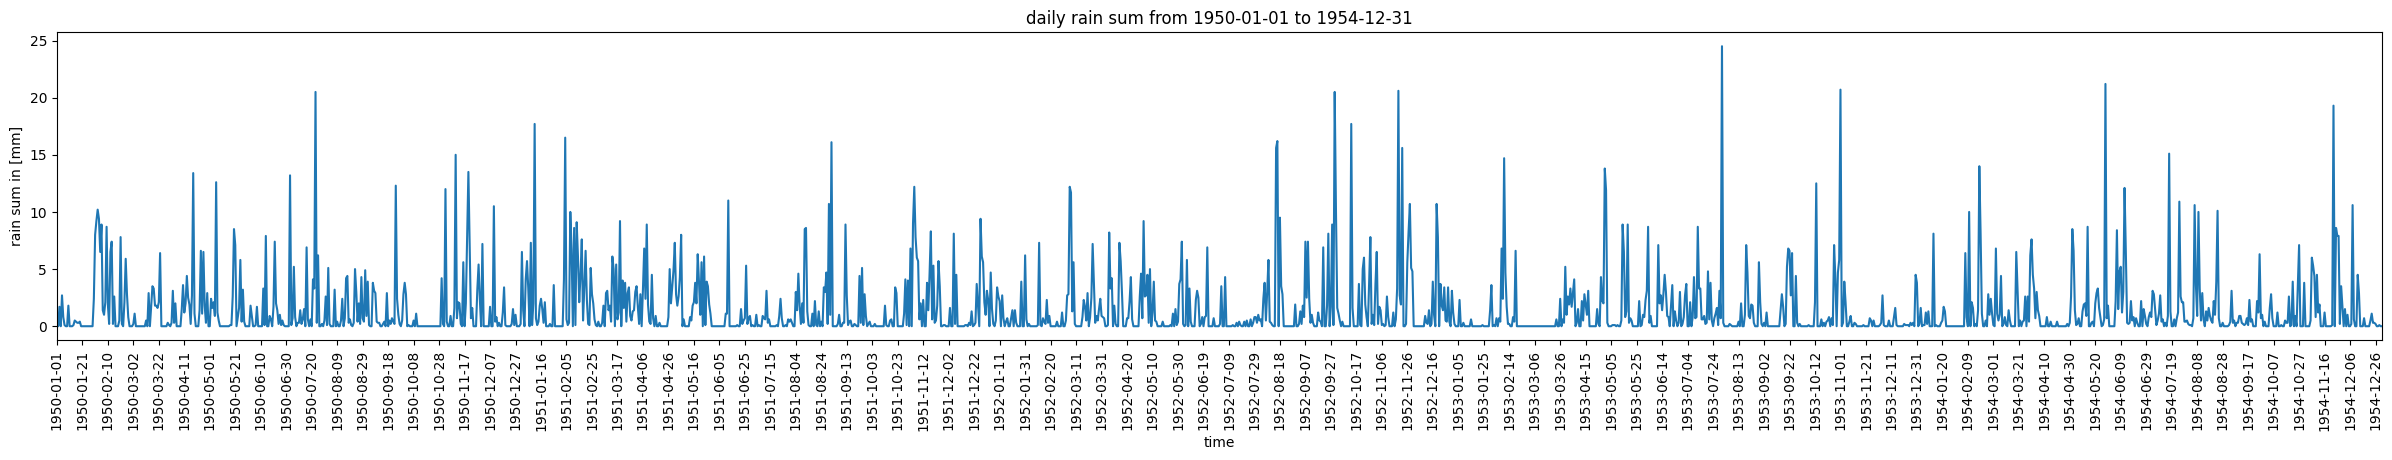

In [57]:

from numpy.typing import ArrayLike
import matplotlib.pyplot as plt


def lineplot(x: ArrayLike, y: ArrayLike, title: str, x_label: str, y_label: str) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for the given data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        y (ArrayLike): value of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig, ax = plt.subplots(1, figsize=(30, 4))

#add data
    ax.plot(x,y)

#remove space
    ax.margins(x=0)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(x[::20], x[::20], rotation=90)

    return fig, ax

#time_series['generationtime_ms'] 
fig_me, ax_me = lineplot(time_series['time'],time_series['rain_sum'],'daily rain sum from 1950-01-01 to 1954-12-31','time','rain sum in [mm]')
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.1: multivariate plots</h4>

* Create a function `lineplots(x, ys, title, x_label, y_label, legend)` that plot the two variables on the same graph and returns both the `Figure` and the `Axis` objects
* Add a legend
</div>

In [59]:
def lineplots(x: ArrayLike, ys: List[ArrayLike], title: str, x_label: str, y_label: str, legend: List[str]) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for each list of data in the given list of data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        ys (List[ArrayLike]): list of values of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        legend (List[str]): list of legend labels
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig, ax = plt.subplots(1, figsize=(30, 4))

#add data
    for y_me in ys:
        ax.plot(x,y_me)

#remove space
    ax.margins(x=0)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(x[::20], x[::20], rotation=90)

    return fig, ax


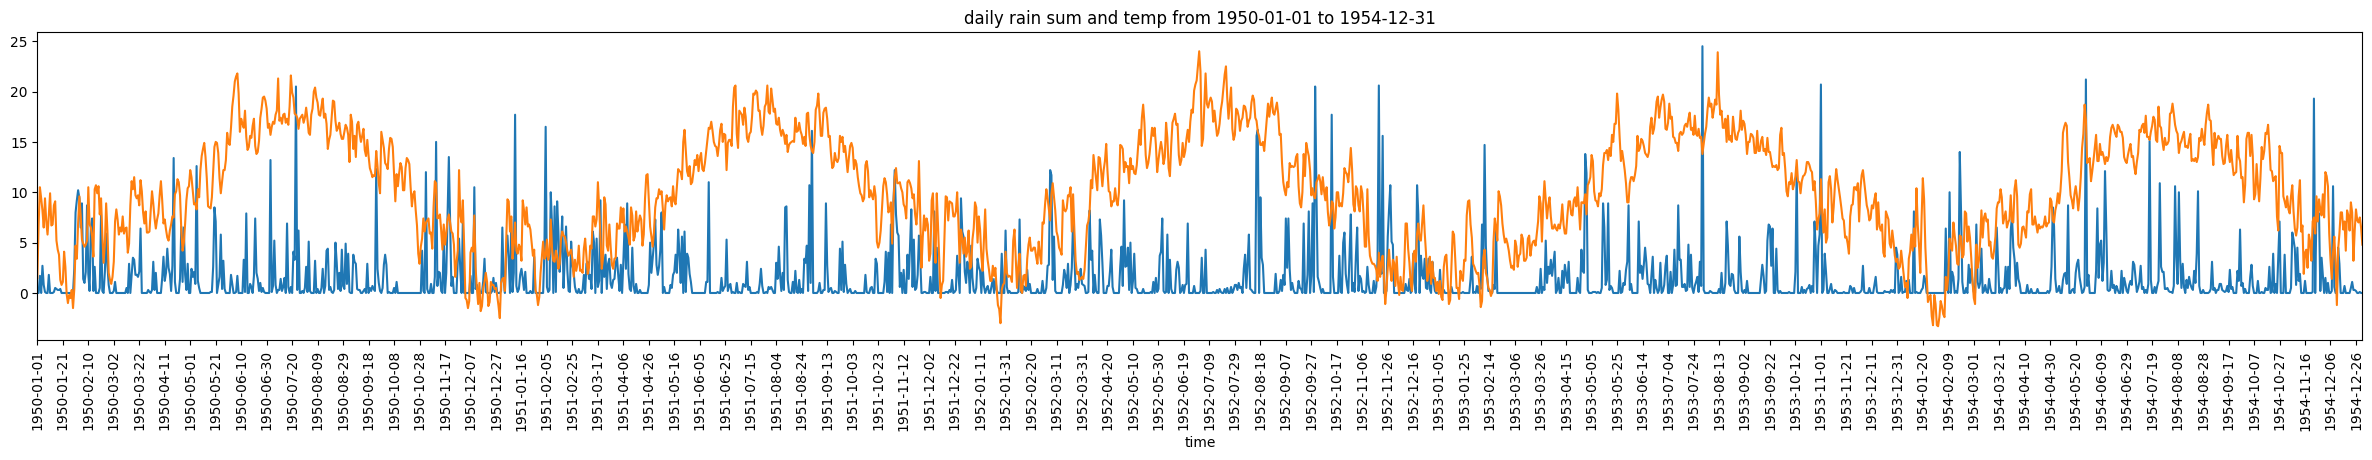

In [64]:

y_me = [time_series['rain_sum'], time_series['temperature_2m_mean']]
fig_me1, ax_me1 = lineplots(time_series['time'],y_me,'daily rain sum and temp from 1950-01-01 to 1954-12-31','time','',legend=["temp [C]","Precipitation [mm]"])
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.2: Plot with additional statistics</h4>

* Create a shaded area plot, where the mean temperature is the central line, and the minimum, and the maximum are the lower and upper bounds of the shaded area.
* The function should return both the `Figure` and the `Axis` objects
* The shaded area must be 0.3 opacity
* See https://swdevnotes.com/python/2020/display-line-chart-range/ for an example output
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can modify existing plots by reusing the `axis`
* For example, running `ax.plot` on an axis that already contains another plot, adds a plot on top of it

</div>


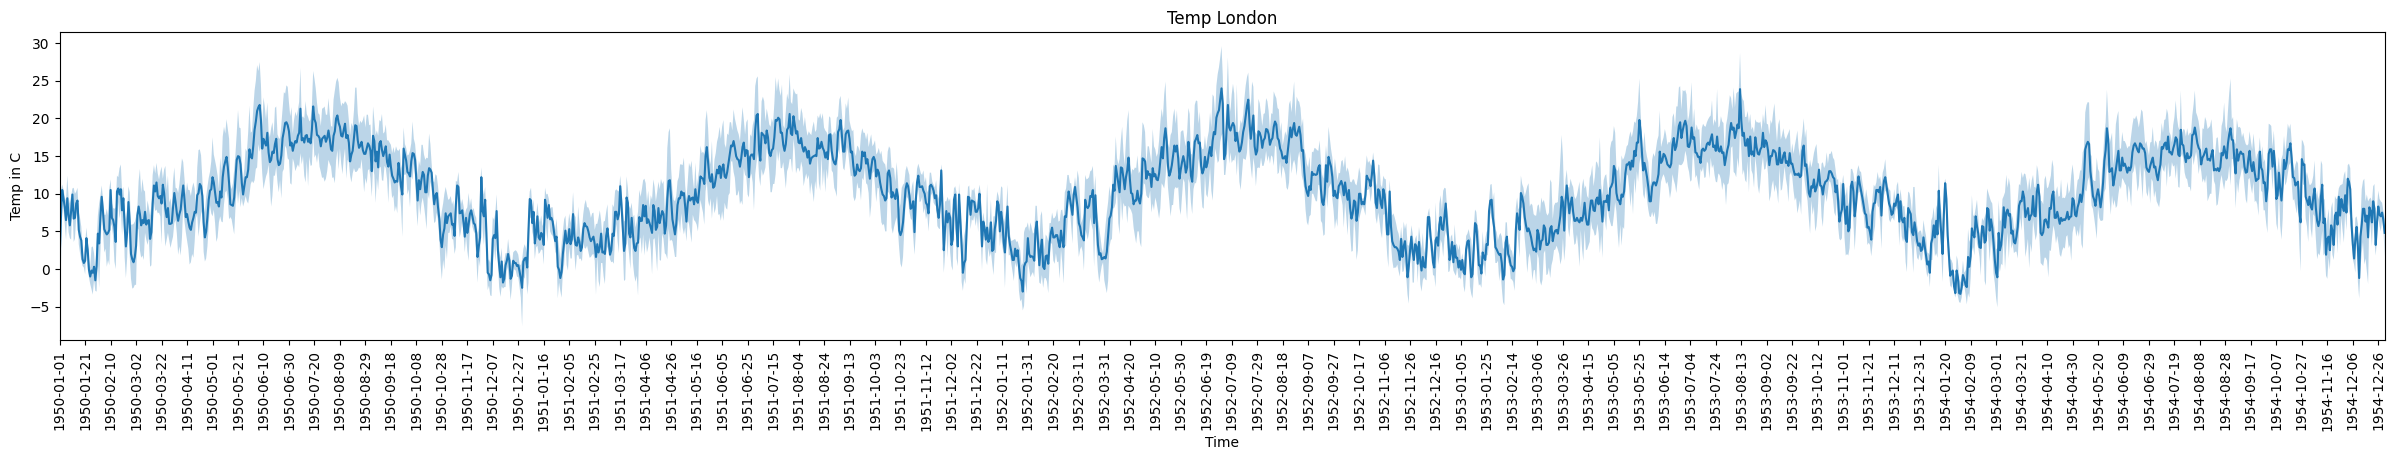

In [65]:
# add your code here
fig_2, ax_2 = lineplot(time_series['time'],time_series['temperature_2m_mean'],'Temp London','Time','Temp in C')
ax_2.fill_between(time_series['time'],time_series['temperature_2m_min'],time_series['temperature_2m_max'],alpha = 0.3)
#ax.fill_between(x, y_min, y_max, alpha=$$opacity)
plt.show()

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 4: Normalising your data</h4>

* Create a function `minmax_norm(x)` that takes the acquired data, normalises the data using Min-Max normalisation only using `numpy`
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

In [66]:
import numpy as np


def minmax_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data between 0 and 1 using the min-max normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    x = np.array(x) #converting to numpy array

    x_norm = (x-x.min())/(x.max()-x.min())

    assert np.isclose(x_norm.min(), 0, rtol=0.01) and np.isclose(x_norm.max(), 1, rtol=0.01), "Normalisation failed. Normalised data not in range [0, 1]"

    # return the results
    return x_norm


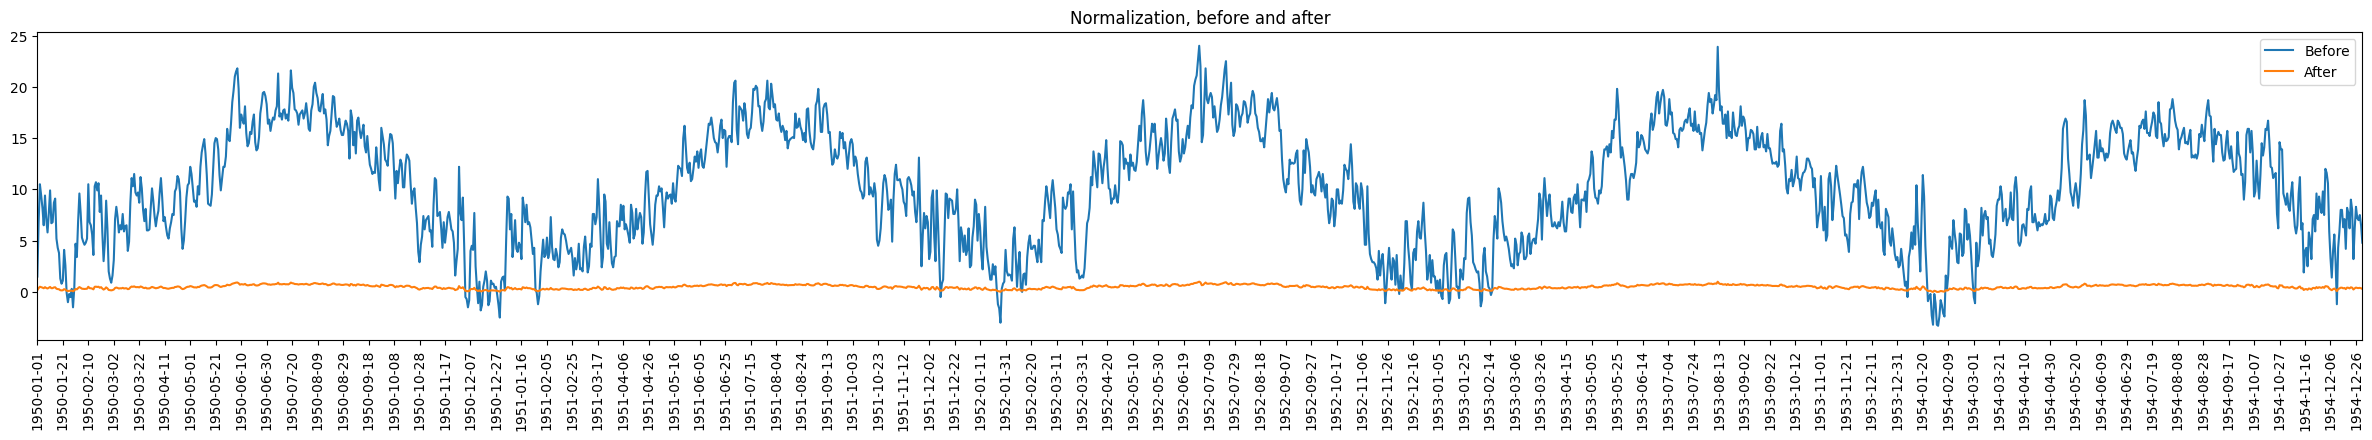

In [68]:
temp_norm = minmax_norm(time_series['temperature_2m_mean'])

fix_4, ax_4 = lineplot(time_series["time"],time_series["temperature_2m_mean"], "Normalization, before and after",'','')
ax_4.plot(time_series["time"],temp_norm)

ax_4.legend(["Before","After"])
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 4.1: Z-score normalisation</h4>

* Create a function `zscore_norm(x)` that takes a pandas series and normalises it using the z-score.
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

In [69]:
def zscore_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data using the z-score normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    x = np.array(x)

    x_norm = (x - x.mean()) / x.std()

    assert np.isclose(x_norm.min(), 0, rtol=0.01) and np.isclose(x_norm.max(), 1, rtol=0.01), "Normalisation failed. Normalised data not in range [0, 1]"

    # return the results
    return x_norm

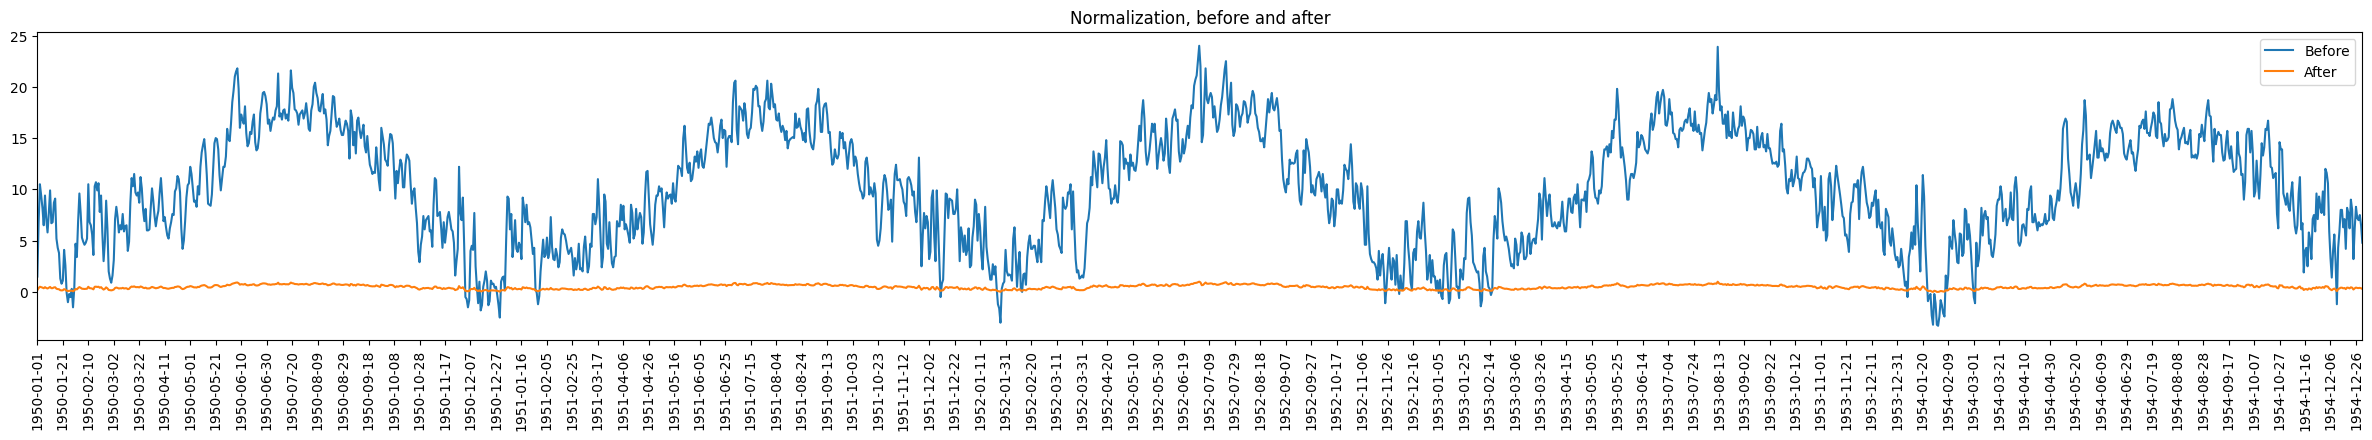

In [76]:
temp_norm2 = minmax_norm(time_series['temperature_2m_mean'])

fix_42, ax_42 = lineplot(time_series["time"],time_series["temperature_2m_mean"], "Normalization, before and after",'','')
ax_42.plot(time_series["time"],temp_norm2)

ax_42.legend(["Before","After"])
plt.show()

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 5: Outliers detection</h4>

* Create a function `zscore_outliers(x, threshold=3)` that takes the acquired data, checks if each data point is an outliers by verifying that its z-score is greater than `threshold`
* The function must return the index of the outliers
* Check for outliers in `temperature_2m_mean`
</div>

In [138]:
def zscore_outliers(x: ArrayLike, threshold: int=1.5) -> ArrayLike:
    """
    Detects outliers using the z-score method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    x = np.array(x)

    x_norm = (x - x.mean()) / (x.std())

    is_out = x_norm > threshold

    if(is_out.any() != 0):
        print("Outlier detected")

    return np.nonzero(is_out), x_norm

In [135]:
temp_out, score = zscore_outliers(time_series['temperature_2m_mean'])
print(score.max())

Outlier detected
2.542679189998475


<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.1: Plotting outliers</h4>

* Create a function `mark_outliers(ax, idx)` that marks the outliers with a red dot
* The function should return the `Figure` and the `Axis` object containing the plot
* Plot the data with the marked outliers
</div>

In [98]:
def mark_outliers(ax: plt.Axes, x: ArrayLike, y: ArrayLike, outliers_idx: ArrayLike) -> plt.Axes:
    """
    Plots red circles around the outliers in a certain line plot.

    Args:
        ax (plt.Axis): the older axis to plot on that contains the original line plot
        x (ArrayLike): the x-data for the line plot
        y (ArrayLike): the y-data for the line plot
        outliers_idx (ArrayLike): indices of the outliers
    """
    # add your code here
    x_plot = np.array(x)[outliers_idx]
    y_plot = np.array(y)[outliers_idx]
    ax.scatter(x_plot,y_plot, c="red", alpha=0.6)
    return ax


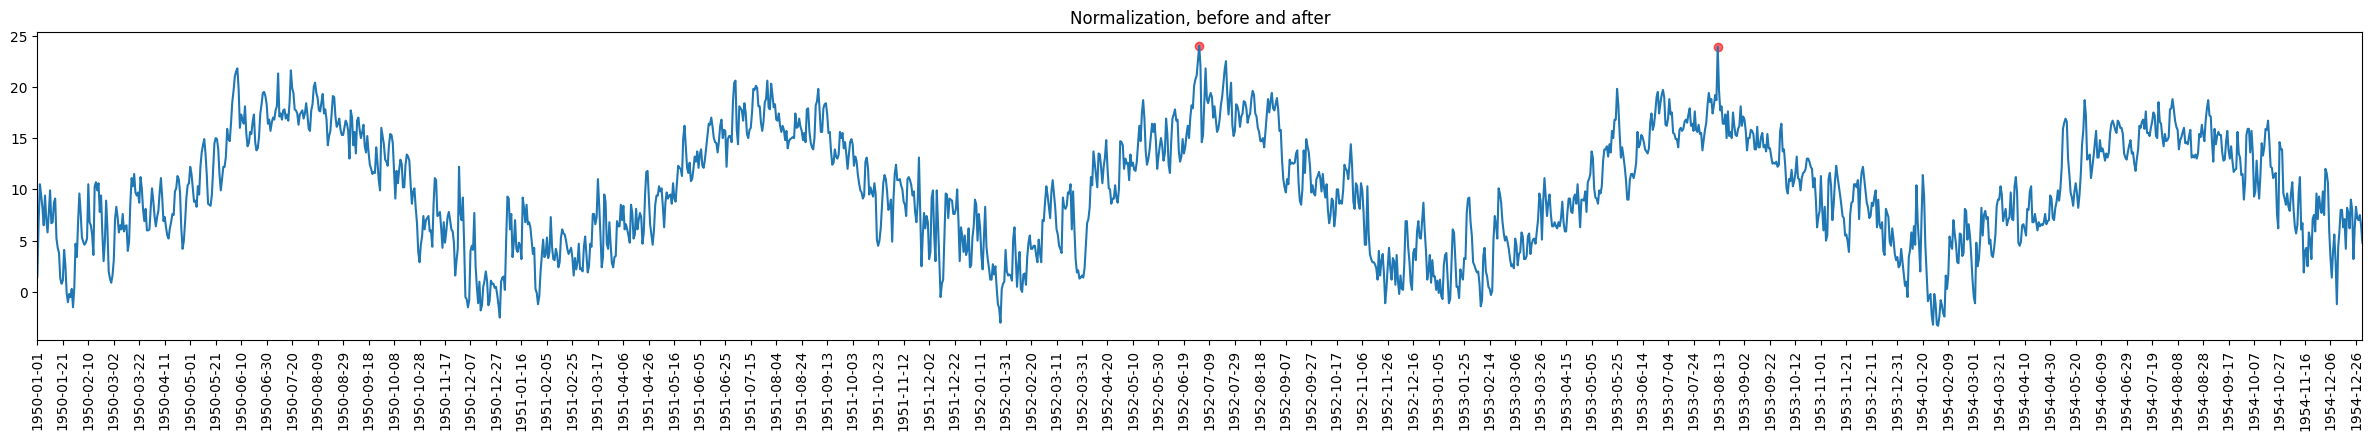

In [99]:
fix_42, ax_42 = lineplot(time_series["time"],time_series["temperature_2m_mean"], "Normalization, before and after",'','')
ax_42 = mark_outliers(ax_42,time_series["time"],time_series["temperature_2m_mean"],temp_out)
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.3: Detect outliers using the IQR method </h4>

* Create a function `iqr_detect(x, threshold=1.5)` that returns the indices of the outliers in the original data according to the **IQR** method
* Plot the data with the marked outliers
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can use `np.quantile` to get the quantile of a uniform, discrete distrbution

</div>


In [100]:
def iqr_detect(x: ArrayLike, threshold: float=1.5) -> ArrayLike:
    """
    Detects outliers using the interquantile range method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (float): threshold for the interquantile range method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    x = np.array(x)

    Q1 = np.quantile(x,0.25)
    Q3 = np.quantile(x,0.75)
    d = Q3 - Q1
    dmin = Q1-threshold * d
    dmax = Q3 + threshold * d

    is_out = np.logical_and((x<dmin),(x>dmax))

    return is_out


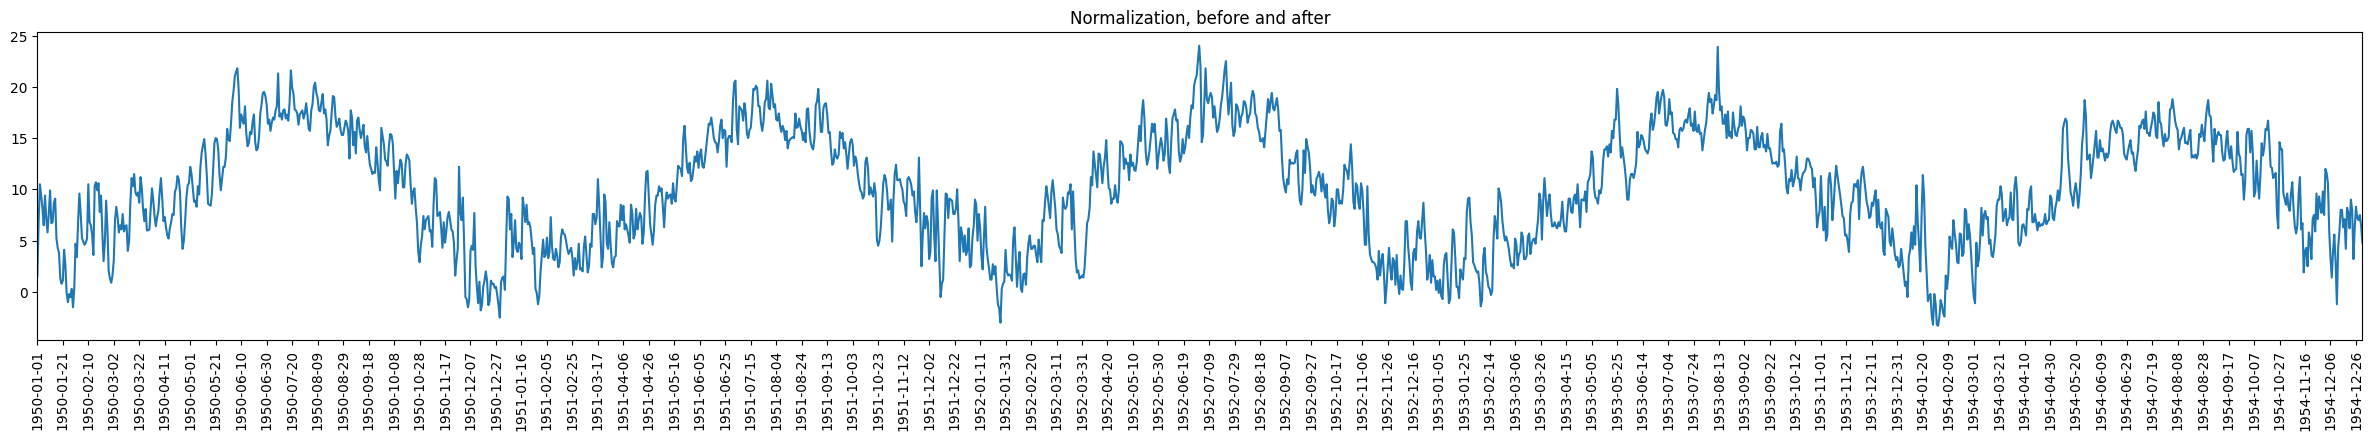

In [102]:
temp_out2= iqr_detect(time_series['temperature_2m_mean'])
fix_42, ax_42 = lineplot(time_series["time"],time_series["temperature_2m_mean"], "Normalization, before and after",'','')
ax_42 = mark_outliers(ax_42,time_series["time"],time_series["temperature_2m_mean"],temp_out2)
plt.show()

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 6: Clamping outliers</h4>

* One way to deal with outliers is to compress them into a range of acceptable values
* Create a function `zscore_clamp(x, threshold=3)` that clamps the outliers into the range between 10th percentile and 90th percentile
* The function should return a numpy array containing the clamped data
* Plot the non-clamped data over the clamped one
  
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Not every outlier is bad!! For example in financial problems, such as stock prediction, outliers is **exactly** what you are looking for
* **Removing outliers in that case might not benefit our analysis**
* Always make an **informed** decision whether to remove outliers and always **justify** it

</div>


In [139]:
def zscore_clamp(x: ArrayLike, threshold: int=1.5) -> ArrayLike:
    """
    Clamps outliers using the z-score method and returns the clamped data.

    Args:
        x (ArrayLike): data to be clamped
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): clamped data
    """
    # add your code here
    tar,score_6 = zscore_outliers(x,threshold)

    x = np.array(x)
    for ta in tar:
        x[ta] = np.clip(x[ta],np.quantile(x,0.1),np.quantile(x,0.9))

    return x

Outlier detected


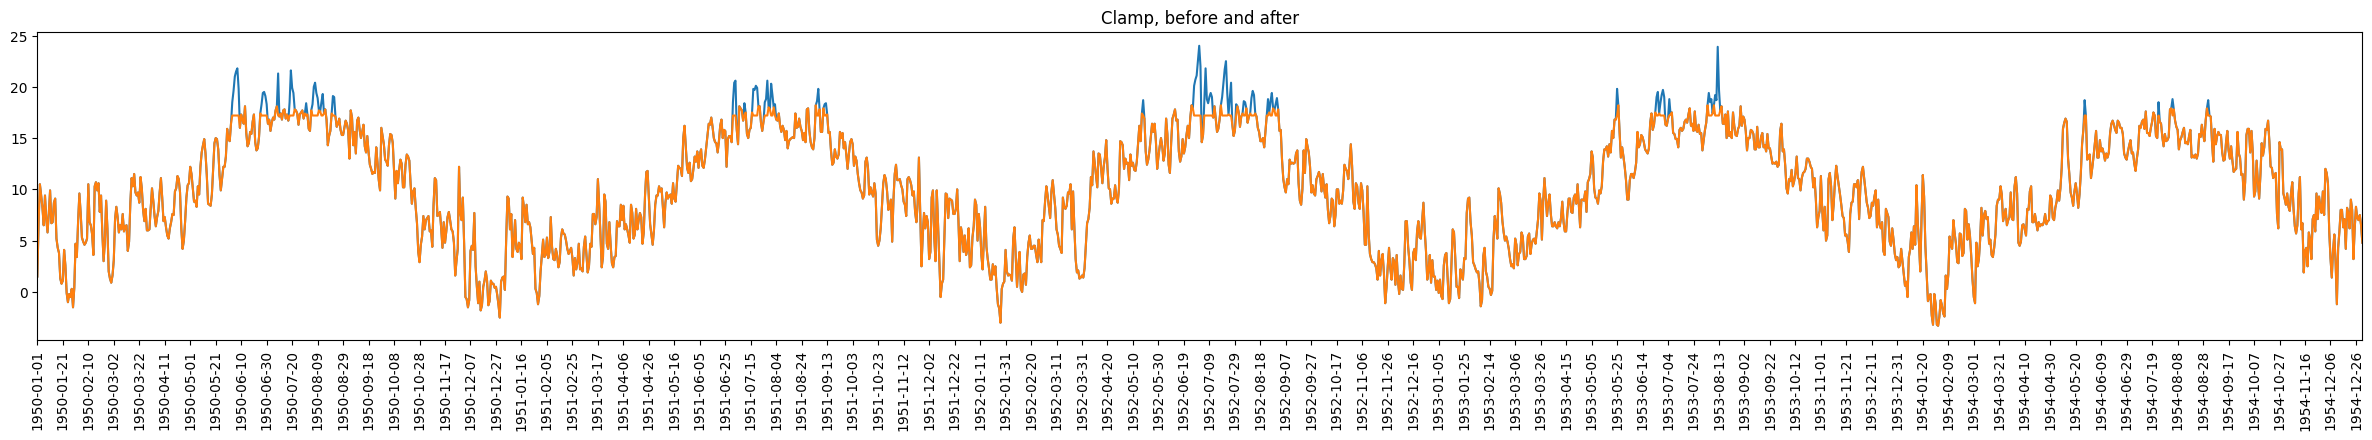

In [140]:
temp_clamp = zscore_clamp(time_series["temperature_2m_mean"])
fix_42, ax_42 = lineplot(time_series["time"],time_series["temperature_2m_mean"], "Clamp, before and after",'','')
ax_42.plot(time_series["time"],temp_clamp)
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 6.1: Replace outliers by n-degree interpolation </h4>

* Create a function `zscore_interp(x, time, threshold=3, deg=3)` that replaces the z-score outliers with values from a polynomial fit on clean data
* The function should return a numpy array containing the interpolated data
* Plot the data before and after replacing outliers
* Experiment with different value of `deg`, e.g., `1`, `3`, `11`, and `23`
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can index a numpy array with another numpy array of boolean values
* This will return only the values at which the index is `True`
* Try using this method to get only the clean data (that without outliers)
</div>


In [146]:
def zscore_interp(x: ArrayLike, y: ArrayLike, threshold: int=1.5, deg: int=1) -> ArrayLike:
    """
    Interpolates outliers using the z-score method and returns the interpolated data using a `deg`-degree approximation.

    Args:
        x (ArrayLike): x-variate of data to be interpolated
        y (ArrayLike): y-variate of data to be interpolated
        threshold (int): threshold for the z-score method
        deg (int): degree of the polynomial approximation

    Returns:
        (ArrayLike): interpolated data
    """
    # add your code here
    x = np.array(x)
    y = np.array(y)

    tar,s = zscore_outliers(y,threshold)

    is_out = np.array([False] * len(x))
    is_out[tar] = True

    rest = y[np.logical_not(is_out)]

    x = np.arange(len(x))
    rest_time = x[np.logical_not(is_out)]

    model = np.polynomial.Polynomial.fit(rest_time,rest,deg=deg)

    inter = np.array(y)
    for i in np.nonzero(is_out):
        inter[i] = model(i)

    return inter

Outlier detected


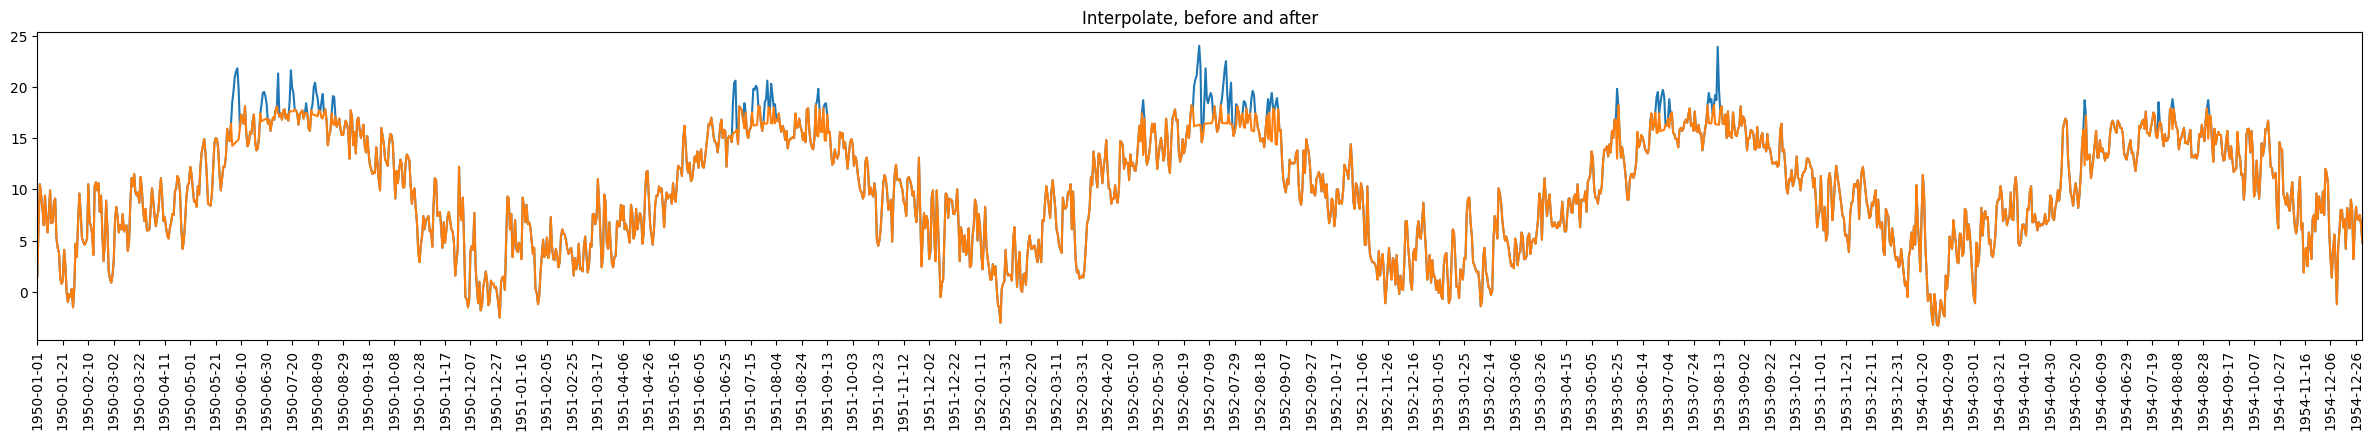

In [147]:
interpolated = zscore_interp(time_series["time"],time_series["temperature_2m_mean"],deg=21)
fix_42, ax_42 = lineplot(time_series["time"],time_series["temperature_2m_mean"], "Interpolate, before and after",'','')
ax_42.plot(time_series["time"],interpolated)
plt.show()

In [158]:
#!git status
!git add 3-Data-processing.ipynb
#!git commit -m "Data got from API, processed with normalization, outlier detection and tried interpolation"
#!git push